In [1]:
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

column_names = ['负荷', 'A、B层摆动喷嘴阀位 ', 'C、D层摆动喷嘴阀位  ', 'E、F层摆动喷嘴阀位 ', '空预器入口烟气温度1',
       'SCR IN O2 ', 'SOFA摆角', 'CCOFAI', 'CCOFAII', 'SOFAI', 'SOFAII',
       'SOFAIII', 'SOFAIV', 'SOFAV', 'SOFAVI', '水分', '热值', '灰分', 'A磨煤量',
       'B磨煤量', 'C磨煤量', 'D磨煤量', 'E磨煤量', 'F磨煤量', 'A磨一次风量', 'B磨一次风量', 'C磨一次风量',
       'D磨一次风量', 'E磨一次风量', 'F磨一次风量', '风箱差压', '主给水', '总燃料量', '磨煤机A出口风粉温度',
       '磨煤机B出口风粉温度', '磨煤机C出口风粉温度', '磨煤机D出口风粉温度', '磨煤机E出口风粉温度', '磨煤机F出口风粉温度',
       '飞灰含碳量']
dataset_path = "csv/fhwhole1.csv"
raw_dataset = pd.read_csv(dataset_path,
                      na_values = "?", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.head()

,负荷,A、B层摆动喷嘴阀位,C、D层摆动喷嘴阀位,E、F层摆动喷嘴阀位,空预器入口烟气温度1,SCR IN O2,SOFA摆角,CCOFAI,CCOFAII,SOFAI,...,风箱差压,主给水,总燃料量,磨煤机A出口风粉温度,磨煤机B出口风粉温度,磨煤机C出口风粉温度,磨煤机D出口风粉温度,磨煤机E出口风粉温度,磨煤机F出口风粉温度,飞灰含碳量
0,628.49,65.8850,67.0325,64.8300,346.115,2.74,64.4550,60.5375,60.2125,100.5700,...,0.32,1783.86,301.53,56.95,64.44,63.40,67.17,72.57,63.45,1.750
1,551.11,88.2950,89.0300,85.3925,324.620,3.64,85.0150,60.2275,60.2175,100.4100,...,0.10,1537.01,276.26,35.09,51.02,58.64,57.76,81.34,56.15,1.595
2,469.09,92.9900,93.8275,93.0425,335.745,3.39,92.8150,60.1450,60.7950,100.5775,...,0.14,1345.16,270.96,53.21,70.37,60.10,60.07,60.27,58.69,1.790
3,642.87,93.0975,93.9675,92.6425,337.460,3.14,92.6300,60.1525,60.3175,100.4175,...,0.36,1833.40,269.46,16.22,53.47,84.74,78.77,81.34,56.90,1.755
4,679.60,49.3600,48.8000,49.0125,349.315,3.51,49.8225,60.3300,60.5700,100.5275,...,0.63,1951.64,360.39,43.27,62.99,58.66,60.41,59.65,59.90,1.845


In [2]:
column_names.remove('飞灰含碳量')
data_cols =column_names 
data_type = (len(data_cols)-1) * ['numerical'] + ['categorical']
data_type = dict(zip(data_cols, data_type))

In [3]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.describe()

,负荷,A、B层摆动喷嘴阀位,C、D层摆动喷嘴阀位,E、F层摆动喷嘴阀位,空预器入口烟气温度1,SCR IN O2,SOFA摆角,CCOFAI,CCOFAII,SOFAI,...,风箱差压,主给水,总燃料量,磨煤机A出口风粉温度,磨煤机B出口风粉温度,磨煤机C出口风粉温度,磨煤机D出口风粉温度,磨煤机E出口风粉温度,磨煤机F出口风粉温度,飞灰含碳量
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,688.578315,75.992739,74.511039,73.533315,348.871039,3.148820,73.660112,72.573652,72.928890,97.747022,...,0.437303,1981.046067,338.383202,53.300169,65.727978,61.260506,63.560000,68.256854,59.726854,1.548146
std,151.705389,14.821123,15.586328,15.326494,15.443531,0.708478,15.219520,16.429202,16.495388,9.393977,...,0.234912,459.614990,64.692202,18.777401,10.573470,4.613425,5.781055,8.226004,2.934809,0.377287
min,405.180000,49.360000,47.657500,49.012500,311.570000,1.400000,49.822500,59.962500,59.767500,41.235000,...,0.060000,1134.240000,213.010000,14.140000,29.310000,53.640000,32.900000,56.460000,51.100000,0.605000
25%,576.250000,62.130625,60.563125,60.037500,338.186250,2.622500,60.205625,60.387500,60.458750,98.310000,...,0.232500,1649.485000,292.445000,39.055000,60.295000,58.625000,59.972500,61.522500,57.952500,1.340000
50%,670.890000,77.121250,74.141250,73.041250,350.167500,3.180000,73.113750,61.963750,61.892500,100.395000,...,0.420000,1930.345000,333.595000,54.475000,66.990000,60.440000,62.450000,64.365000,59.410000,1.500000
75%,806.970000,91.198125,90.155625,89.215625,361.591250,3.650000,89.326250,98.250000,98.134375,100.562500,...,0.640000,2317.682500,386.532500,70.125000,74.477500,62.667500,65.822500,76.235000,61.302500,1.762500
max,999.590000,99.167500,98.967500,98.017500,377.295000,5.010000,101.347500,99.132500,98.860000,100.767500,...,1.040000,2976.260000,487.000000,80.980000,82.070000,84.740000,80.700000,87.640000,74.340000,2.985000


In [4]:
import autokeras as ak

regressor = ak.StructuredDataRegressor(max_trials=1, column_names=data_cols, column_types=data_type)
regressor.fit(x=train_dataset.drop(columns=['飞灰含碳量']), y=train_dataset['飞灰含碳量'])
# Evaluate the accuracy of the found model.
print('Accuracy: {accuracy}'.format(
    accuracy=regressor.evaluate(x=test_dataset.drop(columns=['飞灰含碳量']), y=test_dataset['飞灰含碳量'])))

Train for 5 steps, validate for 2 steps
Epoch 1/1000
5/5 [==============================] - ETA: 3s - loss: 34793.2422 - mean_squared_error: 34793.24 - 1s 236ms/step - loss: 12272.4276 - mean_squared_error: 13460.4971 - val_loss: 902.2633 - val_mean_squared_error: 1024.2133
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 928.2086 - mean_squared_error: 928.20 - 0s 11ms/step - loss: 3858.3366 - mean_squared_error: 3756.1040 - val_loss: 4654.9022 - val_mean_squared_error: 5270.7744
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 5749.8560 - mean_squared_error: 5749.85 - 0s 20ms/step - loss: 2692.5668 - mean_squared_error: 2924.4102 - val_loss: 68.0727 - val_mean_squared_error: 81.3290
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 49.0102 - mean_squared_error: 49.01 - 0s 11ms/step - loss: 591.0717 - mean_squared_error: 546.2117 - val_loss: 1310.0781 - val_mean_squared_error: 1551.1559
Epoch 5/1000
5/5 [==========================

INFO:tensorflow:Oracle triggered exit
Train for 7 steps, validate for 2 steps
Epoch 1/1000
7/7 [==============================] - ETA: 4s - loss: 6461.1299 - mean_squared_error: 6461.12 - 1s 139ms/step - loss: 1878.2945 - mean_squared_error: 2141.1833 - val_loss: 1259.6415 - val_mean_squared_error: 1777.4729
Epoch 2/1000
7/7 [==============================] - ETA: 0s - loss: 2353.3147 - mean_squared_error: 2353.31 - 0s 11ms/step - loss: 785.9429 - mean_squared_error: 867.5543 - val_loss: 612.1408 - val_mean_squared_error: 464.3252
Epoch 3/1000
7/7 [==============================] - ETA: 0s - loss: 293.3136 - mean_squared_error: 293.31 - 0s 10ms/step - loss: 384.7420 - mean_squared_error: 390.1099 - val_loss: 138.2286 - val_mean_squared_error: 126.4356
Epoch 4/1000
7/7 [==============================] - ETA: 0s - loss: 146.1222 - mean_squared_error: 146.12 - 0s 10ms/step - loss: 192.5117 - mean_squared_error: 216.8513 - val_loss: 118.0607 - val_mean_squared_error: 203.7616
Epoch 5/1000


Epoch 38/1000
7/7 [==============================] - ETA: 0s - loss: 9.6079 - mean_squared_error: 9.60 - 0s 9ms/step - loss: 13.3667 - mean_squared_error: 12.5036 - val_loss: 10.4806 - val_mean_squared_error: 14.5744
Epoch 39/1000
7/7 [==============================] - ETA: 0s - loss: 9.4094 - mean_squared_error: 9.40 - 0s 9ms/step - loss: 13.1441 - mean_squared_error: 12.3183 - val_loss: 10.2832 - val_mean_squared_error: 14.3961
Epoch 40/1000
7/7 [==============================] - ETA: 0s - loss: 9.2325 - mean_squared_error: 9.23 - 0s 11ms/step - loss: 12.9277 - mean_squared_error: 12.1356 - val_loss: 10.0834 - val_mean_squared_error: 14.2151
Epoch 41/1000
7/7 [==============================] - ETA: 0s - loss: 9.0684 - mean_squared_error: 9.06 - 0s 10ms/step - loss: 12.7213 - mean_squared_error: 11.9594 - val_loss: 9.8986 - val_mean_squared_error: 14.0341
Epoch 42/1000
7/7 [==============================] - ETA: 0s - loss: 8.9004 - mean_squared_error: 8.90 - 0s 9ms/step - loss: 12.516

Epoch 76/1000
7/7 [==============================] - ETA: 0s - loss: 5.3831 - mean_squared_error: 5.38 - 0s 9ms/step - loss: 7.7045 - mean_squared_error: 7.5635 - val_loss: 6.2385 - val_mean_squared_error: 10.0508
Epoch 77/1000
7/7 [==============================] - ETA: 0s - loss: 5.3038 - mean_squared_error: 5.30 - 0s 9ms/step - loss: 7.5970 - mean_squared_error: 7.4734 - val_loss: 6.1762 - val_mean_squared_error: 10.0008
Epoch 78/1000
7/7 [==============================] - ETA: 0s - loss: 5.2517 - mean_squared_error: 5.25 - 0s 9ms/step - loss: 7.5044 - mean_squared_error: 7.3936 - val_loss: 6.0990 - val_mean_squared_error: 9.9039
Epoch 79/1000
7/7 [==============================] - ETA: 0s - loss: 5.2025 - mean_squared_error: 5.20 - 0s 9ms/step - loss: 7.4143 - mean_squared_error: 7.3070 - val_loss: 6.0222 - val_mean_squared_error: 9.7870
Epoch 80/1000
7/7 [==============================] - ETA: 0s - loss: 5.1432 - mean_squared_error: 5.14 - 0s 9ms/step - loss: 7.3183 - mean_squared

7/7 [==============================] - ETA: 0s - loss: 3.9776 - mean_squared_error: 3.97 - 0s 9ms/step - loss: 5.0115 - mean_squared_error: 5.1685 - val_loss: 4.2957 - val_mean_squared_error: 7.5674
Epoch 115/1000
7/7 [==============================] - ETA: 0s - loss: 3.9631 - mean_squared_error: 3.96 - 0s 9ms/step - loss: 4.9647 - mean_squared_error: 5.1272 - val_loss: 4.2658 - val_mean_squared_error: 7.5253
Epoch 116/1000
7/7 [==============================] - ETA: 0s - loss: 3.9494 - mean_squared_error: 3.94 - 0s 9ms/step - loss: 4.9191 - mean_squared_error: 5.0865 - val_loss: 4.2360 - val_mean_squared_error: 7.4827
Epoch 117/1000
7/7 [==============================] - ETA: 0s - loss: 3.9382 - mean_squared_error: 3.93 - 0s 10ms/step - loss: 4.8750 - mean_squared_error: 5.0474 - val_loss: 4.2081 - val_mean_squared_error: 7.4430
Epoch 118/1000
7/7 [==============================] - ETA: 0s - loss: 3.9291 - mean_squared_error: 3.92 - 0s 9ms/step - loss: 4.8326 - mean_squared_error: 5.0

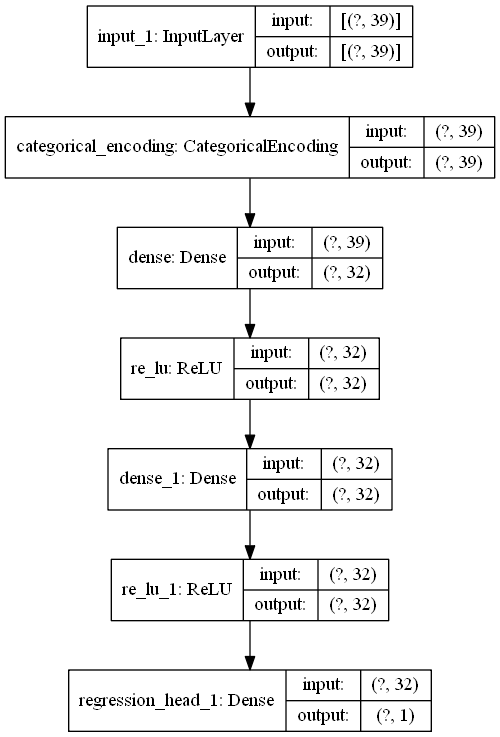

In [5]:
model = regressor.export_model()
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________


AttributeError: 'TrackableWeightHandler' object has no attribute 'shape'